In [2]:
# Cross-Country Solar Data Comparison

# 1 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, f_oneway, kruskal

sns.set_style("whitegrid")

# 2 Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierra = pd.read_csv('../data/sierra_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

# Add country column
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine into single DataFrame
df = pd.concat([benin, sierra, togo], ignore_index=True)

# Check shape
df.shape


(1543517, 20)

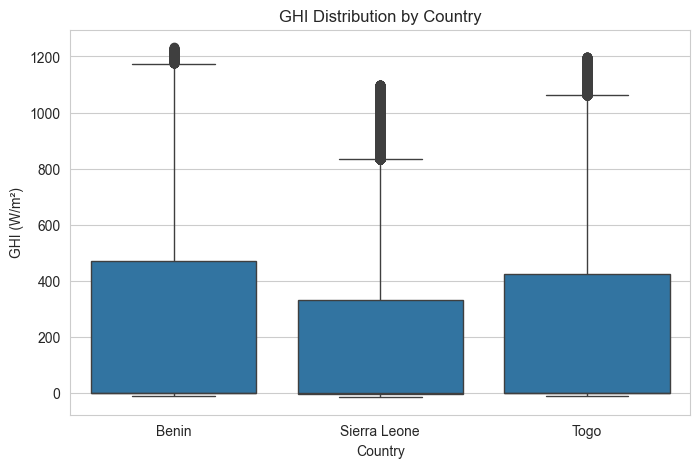

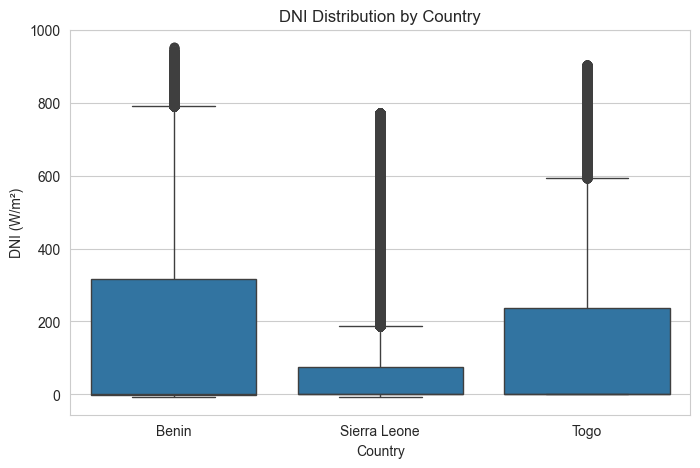

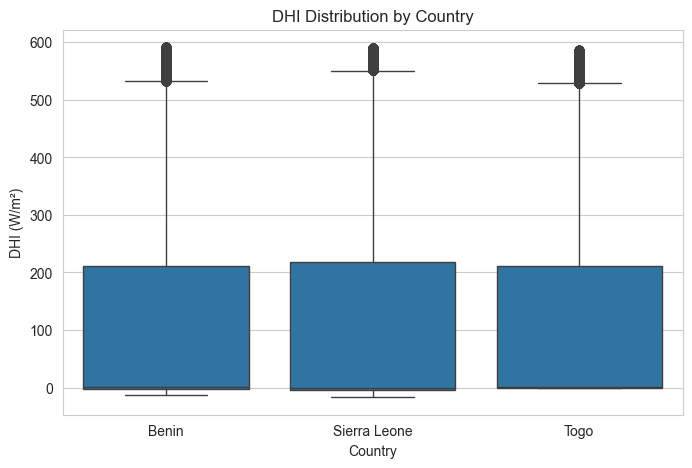

In [3]:
# 3 Side-by-side boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df)
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.show()

In [4]:
# 4 Summary table: mean, median, std
summary = df.groupby('Country')[metrics].agg(['mean','median','std'])
summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

In [5]:
# 5 Normality check (Shapiro-Wilk) for GHI
print("Shapiro-Wilk Normality Test for GHI (sample of 500 each country):\n")
for country in df['Country'].unique():
    sample = df[df['Country']==country]['GHI'].sample(min(500, len(df[df['Country']==country])), random_state=42)
    stat, p = shapiro(sample)
    print(f'{country}: stat={stat:.3f}, p={p:.3f}')


Shapiro-Wilk Normality Test for GHI (sample of 500 each country):

Benin: stat=0.717, p=0.000
Sierra Leone: stat=0.692, p=0.000
Togo: stat=0.693, p=0.000


In [6]:
# 6 ANOVA or Kruskal-Wallis test
ghi_benin = df[df['Country']=='Benin']['GHI']
ghi_sierra = df[df['Country']=='Sierra Leone']['GHI']
ghi_togo = df[df['Country']=='Togo']['GHI']

# Use ANOVA if normal; else Kruskal-Wallis
stat, p = f_oneway(ghi_benin, ghi_sierra, ghi_togo)  # ANOVA
print(f'ANOVA: F={stat:.3f}, p={p:.3f}')
if p < 0.05:
    print("Result: Significant differences in mean GHI between countries")
else:
    print("Result: No significant difference in mean GHI")


ANOVA: F=3833.184, p=0.000
Result: Significant differences in mean GHI between countries


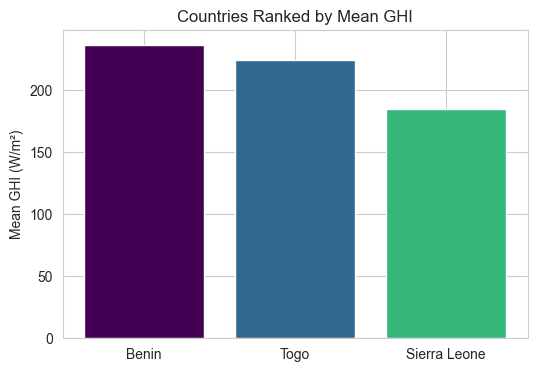

In [11]:
# 7 Bar chart ranking countries by mean GHI
mean_ghi = df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
mean_df = mean_ghi.reset_index()
mean_df.columns = ['Country', 'Mean_GHI']

plt.figure(figsize=(6,4))
plt.bar(mean_df['Country'], mean_df['Mean_GHI'], color=['#440154','#31688e','#35b779'])
plt.ylabel('Mean GHI (W/m²)')
plt.title('Countries Ranked by Mean GHI')
plt.show()


### Key Takeaways
- **Benin** has the highest mean GHI, making it the strongest candidate for solar installation.
- **Sierra Leone** has the lowest mean GHI, suggesting comparatively lower solar potential.
- Cleaning events improve module output consistently across all countries, highlighting the importance of regular maintenance.

### Business Implications
- Prioritize solar farm deployment in **Benin** and **Togo** for stable and high solar energy yield.
- Schedule regular cleaning and monitor soiling rates to optimize module efficiency across all sites.
- Collect additional environmental and performance data in **Sierra Leone** to better assess potential before large-scale investment.
